In [0]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np, math,re,random
import scipy.spatial
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR, LogisticRegression as LogR 
from sklearn.decomposition import PCA

In [0]:
def random_gen(num):
  ran=[]
  ran=random.sample(range(1, 48), num)
  return ran


def gen_train_data(ran,matrix,d):
    train_data=[]
    positive=[]
    negative=[]
    neutral=[]
    for i in range(len(matrix)):
      if matrix[i][d]==1:
        positive.append(matrix[i])
      elif matrix[i][d]==2:
        negative.append(matrix[i])
      else:
        neutral.append(matrix[i])
    for i in ran:
        train_data.append(positive[i])
        train_data.append(negative[i])
    return train_data

In [0]:
with open('/content/gdrive/My Drive/datasets/prnnass2/iris_dataset.txt') as file:
    array2d = [[digit for digit in re.split(',|\n',line)] for line in file]

array2d=array2d[:149]
matrix=[]
for i in range(len(array2d)):
  temp=[]
  for j in range (5):
    temp.append(float(array2d[i][j]))
  matrix.append(temp)

#print(matrix)
matrix=np.array(matrix)
no_of_ele=len(matrix)
#print(matrix.shape)



class1=[]
class2=[]
class3=[]
for i in range(len(matrix)):
  if matrix[i][4]==1:
    class1.append(matrix[i])
  elif matrix[i][4]==2:
    class2.append(matrix[i])
  else:
    class3.append(matrix[i])

print(len(class3))
ran=random_gen(10)


train_data=[]
test_data=[]

count=0
for i in range(49):
  if i in ran :
      test_data.append(class1[i])
      test_data.append(class2[i])
      test_data.append(class3[i])
  else:
    if count <30 :
      train_data.append(class1[i])
      train_data.append(class2[i])
      train_data.append(class3[i])
      count+=1
train_data=np.array(train_data)
test_data=np.array(test_data)

print(train_data)
pca=PCA(n_components=3)

test=pca.fit_transform(test_data[:,:4])
# train_data=matrix[:125]
# test_data=matrix[125:150]

49
[[5.1 3.5 1.4 0.2 1. ]
 [7.  3.2 4.7 1.4 2. ]
 [6.3 3.3 6.  2.5 3. ]
 [4.7 3.2 1.3 0.2 1. ]
 [6.9 3.1 4.9 1.5 2. ]
 [7.1 3.  5.9 2.1 3. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.5 2.3 4.  1.3 2. ]
 [6.3 2.9 5.6 1.8 3. ]
 [5.  3.6 1.4 0.2 1. ]
 [6.5 2.8 4.6 1.5 2. ]
 [6.5 3.  5.8 2.2 3. ]
 [5.4 3.9 1.7 0.4 1. ]
 [5.7 2.8 4.5 1.3 2. ]
 [7.6 3.  6.6 2.1 3. ]
 [4.6 3.4 1.4 0.3 1. ]
 [6.3 3.3 4.7 1.6 2. ]
 [4.9 2.5 4.5 1.7 3. ]
 [5.  3.4 1.5 0.2 1. ]
 [4.9 2.4 3.3 1.  2. ]
 [7.3 2.9 6.3 1.8 3. ]
 [4.9 3.1 1.5 0.1 1. ]
 [5.2 2.7 3.9 1.4 2. ]
 [7.2 3.6 6.1 2.5 3. ]
 [5.4 3.7 1.5 0.2 1. ]
 [5.  2.  3.5 1.  2. ]
 [6.5 3.2 5.1 2.  3. ]
 [4.8 3.  1.4 0.1 1. ]
 [6.  2.2 4.  1.  2. ]
 [6.8 3.  5.5 2.1 3. ]
 [4.3 3.  1.1 0.1 1. ]
 [6.1 2.9 4.7 1.4 2. ]
 [5.7 2.5 5.  2.  3. ]
 [5.8 4.  1.2 0.2 1. ]
 [5.6 2.9 3.6 1.3 2. ]
 [5.8 2.8 5.1 2.4 3. ]
 [5.7 4.4 1.5 0.4 1. ]
 [6.7 3.1 4.4 1.4 2. ]
 [6.4 3.2 5.3 2.3 3. ]
 [5.4 3.9 1.3 0.4 1. ]
 [5.6 3.  4.5 1.5 2. ]
 [6.5 3.  5.5 1.8 3. ]
 [5.1 3.5 1.4 0.3 1. ]
 [5.8 2.

one hot vector embedings

In [0]:
def get_one_hot_vector(train_data):
  ohv=[]
  for i in range(len(train_data)):
    if train_data[i][4]==1:
      ohv.append([1,0,0])
    elif train_data[i][4]==2:
      ohv.append([0,1,0])
    else:
      ohv.append([0,0,1])
  return ohv

get original label

In [0]:
def get_org_label(X):
  X=np.array(X)
  Y=[]
  for i in range(len(X)):
    Y.append(np.argmax(X[i])+1)
  return Y

**generating one vs all classifier**

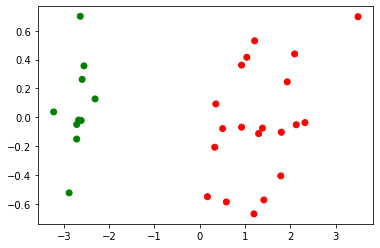

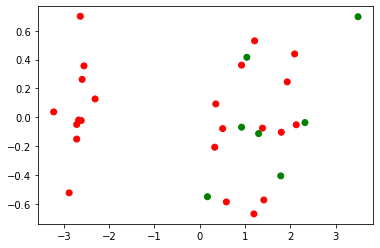

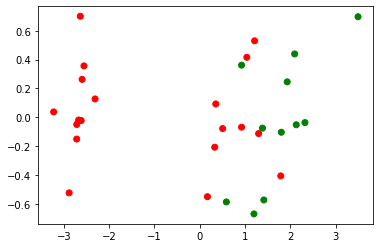

30
1.0
0.7
0.7666666666666666


In [0]:
import matplotlib
def one_vs_all(train_data):
  result=[]
  for i in range(3):
    
    train=np.copy(train_data)
    #print(train_data)
    temp=[]
    for j in range (len(train_data)):
      if train[j][4] != i+1 :
        train[j][4]=-1

      else:
        train[j][4]=1
    #print(train)
    t=LR().fit(train[:,:4],train[:,4]).predict(test_data[:,:4])
    #print(t)
    te=[]
    for j in range (len(t)):
      if t[j]>0:
        te.append(1)
      else:
        te.append(-1)
    colors = ['red','green']
    plt.scatter(test[:,0],test[:,1],c=te, cmap=matplotlib.colors.ListedColormap(colors))
    
    plt.show()
    result.append(te)  
    #print(train)
  return result
def accuracy(X,Y):
  err=0
  for i in range (len(X)):
    if(X[i]!=Y[i]):
      err+=1
  return 1-(err/len(X))


def classifier_one_vs_all():
  X=one_vs_all(train_data)
  result=[]
  for i in range (len(test_data)):
    large=X[0][i]
    large_id=1
    if X[1][i]>large :
      large=X[1][i]
      large_id=2
    if X[2][i]>large:
      large=X[2][i]
      large_id=3
    if large==-1:
      large_id=0
    result.append(large_id)
  return result

A=classifier_one_vs_all()
print(len(A))
B=LogR().fit(train_data[:,:4],train_data[:,4]).predict(test_data[:,:4])
C=LR().fit(train_data[:,:4],get_one_hot_vector(train_data)).predict(test_data[:,:4])
print(accuracy(B,test_data[:,4]))
print(accuracy(A,test_data[:,4]))
print(accuracy(get_org_label(C),test_data[:,4]))
#print(get_org_label(C))
#print(test_data[:,4])
#print(accuracy(C,get_one_hot_vector(test_data)))

plotting the data

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time




time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(test_data[:,:4])







[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.325264
[t-SNE] KL divergence after 300 iterations: 1.640455


ValueError: ignored

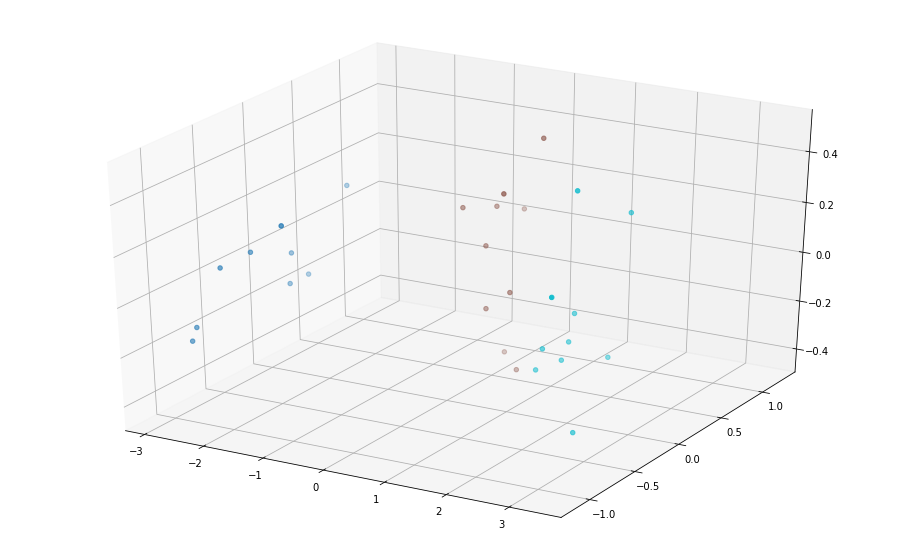

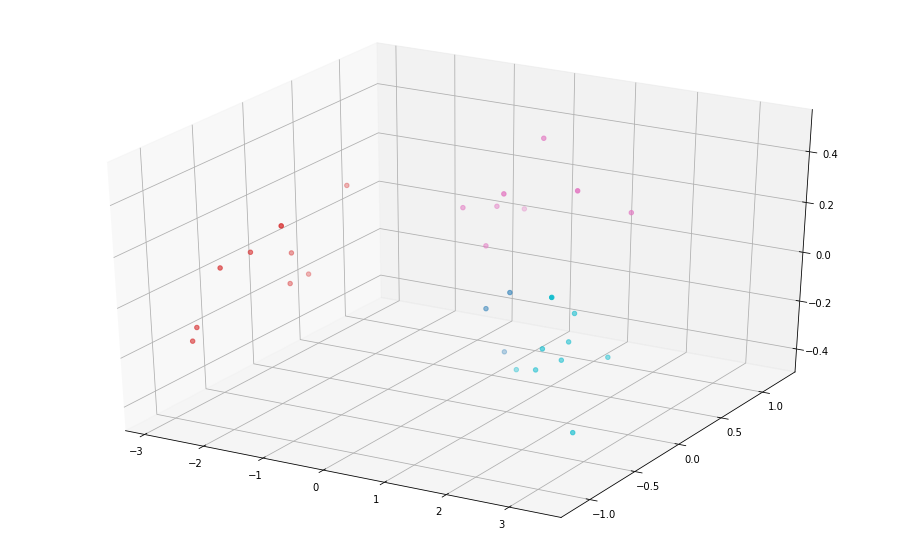

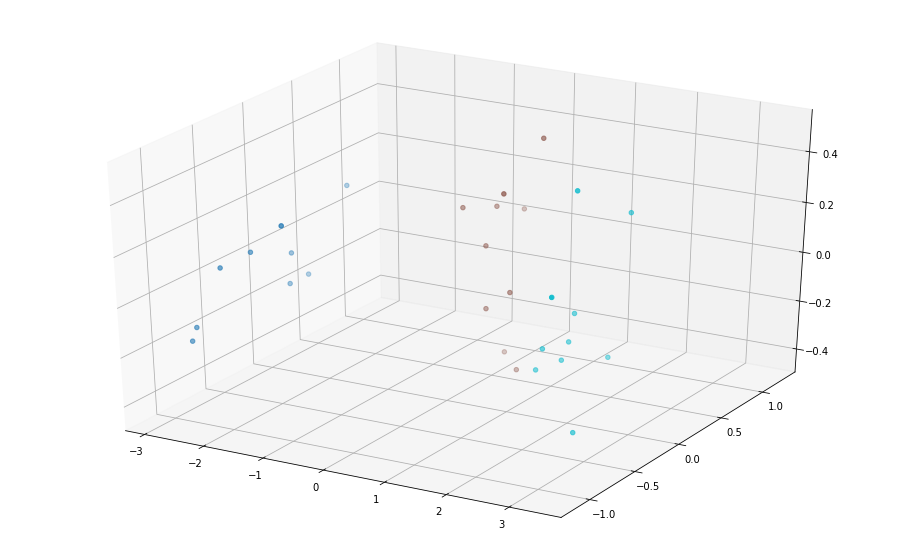

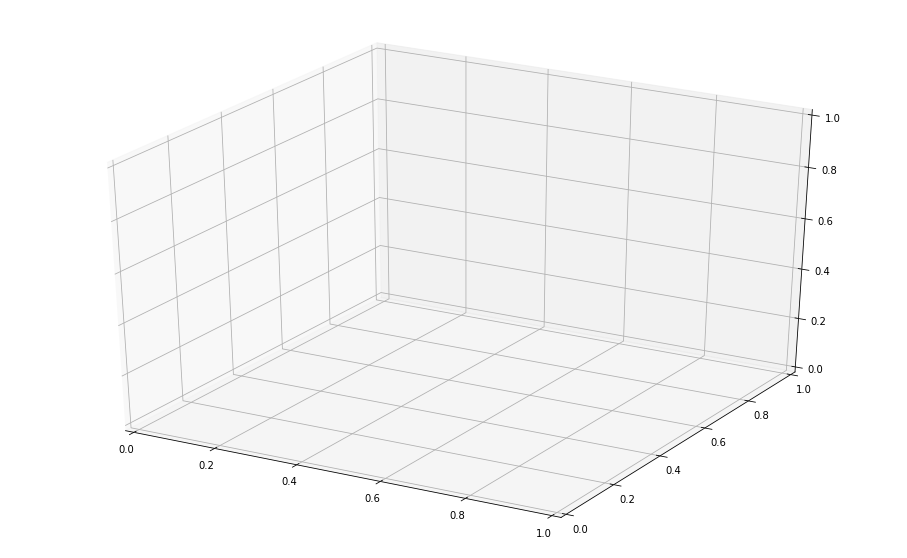

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')


ax.scatter(
    xs=test[:,0], 
    ys=test[:,1], 
    zs=test[:,2], 
    c=test_data[:,4], 
    cmap='tab10'
)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')


ax.scatter(
    xs=test[:,0], 
    ys=test[:,1], 
    zs=test[:,2], 
    c=A, 
    cmap='tab10'
)
ax = plt.figure(figsize=(16,10)).gca(projection='3d')


ax.scatter(
    xs=test[:,0], 
    ys=test[:,1], 
    zs=test[:,2], 
    c=B, 
    cmap='tab10'
)
ax = plt.figure(figsize=(16,10)).gca(projection='3d')


ax.scatter(
    xs=test[:,0], 
    ys=test[:,1], 
    zs=test[:,2], 
    c=C, 
    cmap='tab10'
)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.653267
[t-SNE] KL divergence after 300 iterations: 0.572991


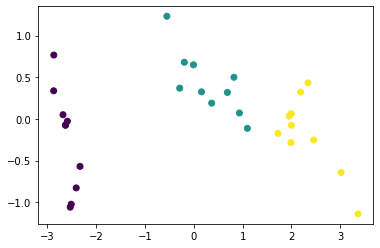

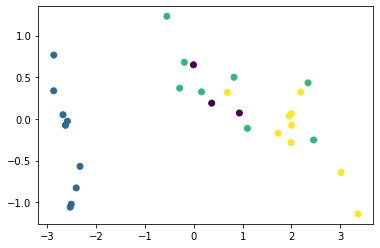

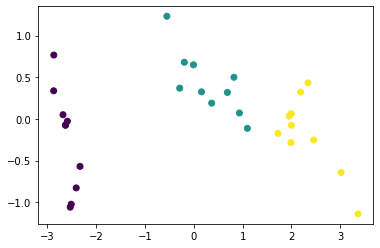

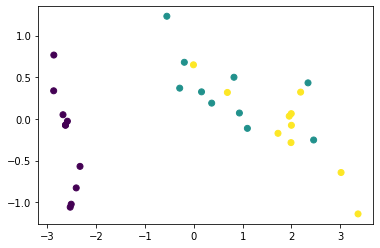

In [0]:
import seaborn as sns
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(test_data[:,:4])



plt.scatter(test[:,0],test[:,1],c=test_data[:,4])
plt.show()
# plt.figure(figsize=(16,10))
plt.scatter(test[:,0],test[:,1],c=A)
#plt.legend(['does not belong to any class'])
# plt.legend(['class1','class2','class3'])
plt.show()

plt.scatter(test[:,0],test[:,1],c=B)

plt.show()

plt.scatter(test[:,0],test[:,1],c=get_org_label(C))

plt.show()

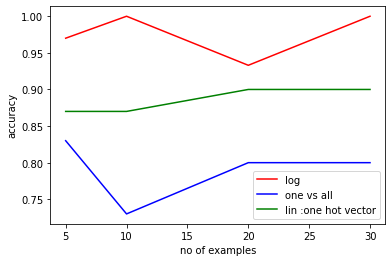

In [0]:
lo=[.97,1,.933,1]
oa=[.83,.73,.8,.8]
loh=[.87,.87,.9,.9]

g=[5,10,20,30]

plt.plot(g,lo,color='red')
plt.plot(g,oa,color='blue')
plt.plot(g,loh,color='green')
plt.legend(['log','one vs all','lin :one hot vector'])
plt.xlabel("no of examples")
plt.ylabel("accuracy")
plt.show()
